In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [2]:
A = pd.read_excel("C:/Users/adiso/Downloads/Customer Journey data_DA Assignment.xlsx", sheet_name = "Data")
A

,ID,Created At,Updated At,Intro View,Audio Journey,Self Explore,Accessories,EMI,Exchange,Book Now,Finance,Test Drive,Terms & Condition,Model ID,Variant ID,Showroom Price,Accessories price,City,State,Pincode
0,1040781,2022-11-01 00:04:11,2022-11-01 00:21:05,yes,no,no,yes,no,no,no,no,no,no,3,62,2049800,68629.0,Delhi,Delhi,NaN
1,1040782,2022-11-01 00:04:24,2022-11-01 00:04:24,no,no,no,no,no,no,no,no,no,no,3,62,2069800,NaN,Delhi,Delhi,NaN
2,1040783,2022-11-01 00:04:55,2022-11-01 00:04:55,no,no,no,no,no,no,no,no,no,no,3,62,2069800,0.0,Delhi,Delhi,NaN
3,1040784,2022-11-01 00:08:32,2022-11-01 00:31:51,no,no,no,yes,no,no,no,no,no,no,5,85,1455800,21697.0,Delhi,Delhi,NaN
4,1040785,2022-11-01 00:08:34,2022-11-01 00:09:20,no,no,no,no,no,no,no,no,no,no,4,93,4077800,0.0,Delhi,Delhi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,1060903,2022-11-30 23:44:05,2022-11-30 23:44:05,no,no,no,no,no,no,no,no,no,no,6,81,2258000,0.0,Delhi,Delhi,NaN
13022,1060904,2022-11-30 23:52:39,2022-11-30 23:52:39,no,no,no,no,no,no,no,no,no,no,5,74,1669800,0.0,Delhi,Delhi,NaN
13023,1060905,2022-11-30 23:53:21,2022-11-30 23:53:21,no,no,no,no,no,no,no,no,no,no,1,46,1977800,0.0,Delhi,Delhi,NaN
13024,1060906,2022-11-30 23:57:56,2022-12-01 00:05:45,no,no,no,yes,no,no,no,no,no,no,5,74,1669800,16963.0,Bengaluru,Karnataka,NaN


In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13026 entries, 0 to 13025
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 13026 non-null  int64         
 1   Created At         13026 non-null  datetime64[ns]
 2   Updated At         13026 non-null  datetime64[ns]
 3   Intro View         13026 non-null  object        
 4   Audio Journey      13026 non-null  object        
 5   Self Explore       13026 non-null  object        
 6   Accessories        13026 non-null  object        
 7   EMI                13026 non-null  object        
 8   Exchange           13026 non-null  object        
 9   Book Now           13026 non-null  object        
 10  Finance            13026 non-null  object        
 11  Test Drive         13026 non-null  object        
 12  Terms & Condition  13026 non-null  object        
 13  Model ID           13026 non-null  int64         
 14  Varian

In [4]:
A.describe()

,ID,Model ID,Variant ID,Showroom Price,Accessories price,Pincode
count,1.302600e+04,13026.000000,13026.000000,1.302600e+04,10498.000000,1165.000000
mean,1.050714e+06,3.708506,68.787655,2.067519e+06,8760.733854,392328.202575
std,5.839826e+03,1.752568,16.238966,7.372671e+05,18385.797050,183080.133221
min,1.040781e+06,1.000000,36.000000,1.031800e+06,0.000000,100001.000000
25%,1.045609e+06,3.000000,59.000000,1.669800e+06,0.000000,141001.000000
50%,1.050596e+06,5.000000,73.000000,1.977800e+06,0.000000,410209.000000
75%,1.055752e+06,5.000000,80.000000,2.069800e+06,8004.000000,530068.000000
max,1.060907e+06,7.000000,136.000000,4.077800e+06,140892.000000,829205.000000


In [5]:
A_new = A.drop(['Created At', 'Updated At', 'ID','Terms & Condition', 'Finance', 'Exchange', 'Pincode', 'City', 'State'], axis=1)

In [6]:
A_new

,Intro View,Audio Journey,Self Explore,Accessories,EMI,Book Now,Test Drive,Model ID,Variant ID,Showroom Price,Accessories price
0,yes,no,no,yes,no,no,no,3,62,2049800,68629.0
1,no,no,no,no,no,no,no,3,62,2069800,NaN
2,no,no,no,no,no,no,no,3,62,2069800,0.0
3,no,no,no,yes,no,no,no,5,85,1455800,21697.0
4,no,no,no,no,no,no,no,4,93,4077800,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13021,no,no,no,no,no,no,no,6,81,2258000,0.0
13022,no,no,no,no,no,no,no,5,74,1669800,0.0
13023,no,no,no,no,no,no,no,1,46,1977800,0.0
13024,no,no,no,yes,no,no,no,5,74,1669800,16963.0


In [7]:
dups = A_new.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
A_new[dups]

Number of duplicate rows = 8924


,Intro View,Audio Journey,Self Explore,Accessories,EMI,Book Now,Test Drive,Model ID,Variant ID,Showroom Price,Accessories price
23,no,no,no,yes,no,no,no,5,75,1822800,848.0
36,yes,no,no,no,no,no,no,5,75,1822800,0.0
37,no,no,yes,no,no,no,no,4,88,4077800,NaN
48,yes,no,no,no,no,no,no,1,46,1977800,NaN
50,yes,no,no,no,no,no,no,1,46,1977800,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13020,no,no,no,yes,no,no,no,5,75,1822800,848.0
13021,no,no,no,no,no,no,no,6,81,2258000,0.0
13022,no,no,no,no,no,no,no,5,74,1669800,0.0
13023,no,no,no,no,no,no,no,1,46,1977800,0.0


In [8]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(A_new[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(A_new[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=A_new[column])
    plt.show()

In [9]:
A_num = A_new.select_dtypes(include = ['float64', 'int64'])
A_cat = A_new.select_dtypes(['object'])
lstcategoricalcolumns = list(A_cat.columns.values)
lstnumericcolumns = list(A_num.columns.values)
Cat_Length = len(lstcategoricalcolumns)
Num_Length = len(lstnumericcolumns)
print("Length of Numerical columns is :", Num_Length)
print("Length of Categorical columns is :", Cat_Length)

Length of Numerical columns is : 4
Length of Categorical columns is : 7


Description of Model ID
----------------------------------------------------------------------------
count    13026.000000
mean         3.708506
std          1.752568
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          7.000000
Name: Model ID, dtype: float64 Distribution of Model ID
----------------------------------------------------------------------------


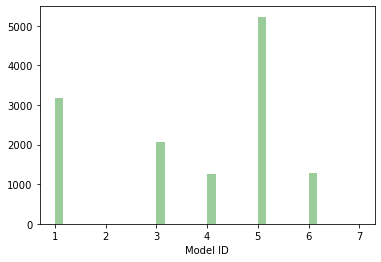

BoxPlot of Model ID
----------------------------------------------------------------------------


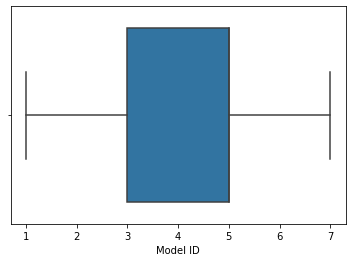

Description of Variant ID
----------------------------------------------------------------------------
count    13026.000000
mean        68.787655
std         16.238966
min         36.000000
25%         59.000000
50%         73.000000
75%         80.000000
max        136.000000
Name: Variant ID, dtype: float64 Distribution of Variant ID
----------------------------------------------------------------------------


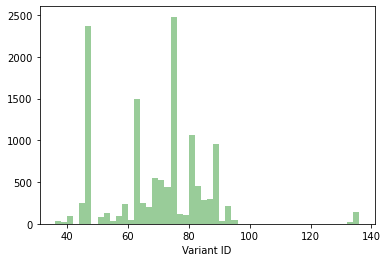

BoxPlot of Variant ID
----------------------------------------------------------------------------


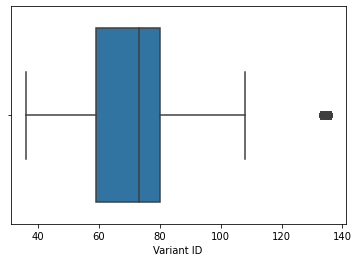

Description of Showroom Price
----------------------------------------------------------------------------
count    1.302600e+04
mean     2.067519e+06
std      7.372671e+05
min      1.031800e+06
25%      1.669800e+06
50%      1.977800e+06
75%      2.069800e+06
max      4.077800e+06
Name: Showroom Price, dtype: float64 Distribution of Showroom Price
----------------------------------------------------------------------------


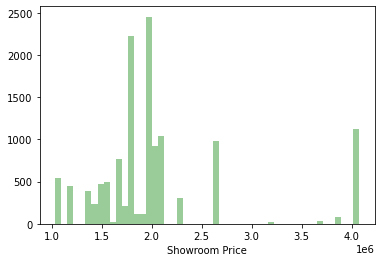

BoxPlot of Showroom Price
----------------------------------------------------------------------------


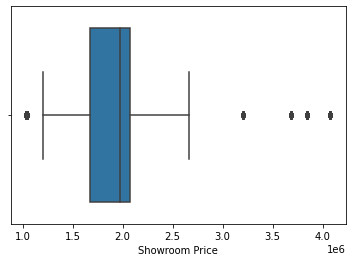

Description of Accessories price
----------------------------------------------------------------------------
count     10498.000000
mean       8760.733854
std       18385.797050
min           0.000000
25%           0.000000
50%           0.000000
75%        8004.000000
max      140892.000000
Name: Accessories price, dtype: float64 Distribution of Accessories price
----------------------------------------------------------------------------


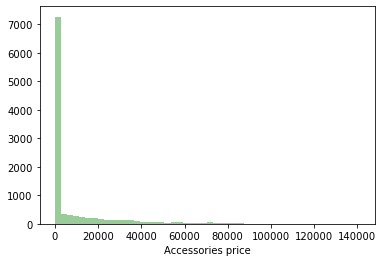

BoxPlot of Accessories price
----------------------------------------------------------------------------


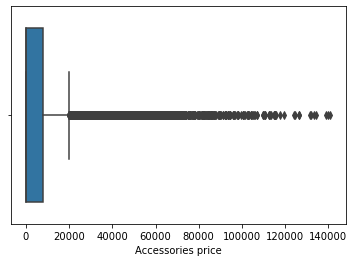

In [10]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [11]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------------------")
    print(A_cat[cat_column].value_counts())
    plt.figure()
    A_cat[cat_column].value_counts().plot.bar(title = 'Frequency Distribution of' + cat_column)
    plt.show()
    print(" ")

In [12]:
A_cat = A_new.select_dtypes(include =['object'])
Categorical_column_list = list(A_cat.columns.values)
Categorical_column_list

['Intro View',
 'Audio Journey',
 'Self Explore',
 'Accessories',
 'EMI',
 'Book Now',
 'Test Drive']

Details of Intro View
----------------------------------------------------------------------------
no     10140
yes     2886
Name: Intro View, dtype: int64


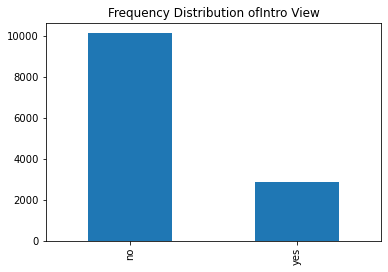

 
Details of Audio Journey
----------------------------------------------------------------------------
no     12239
yes      787
Name: Audio Journey, dtype: int64


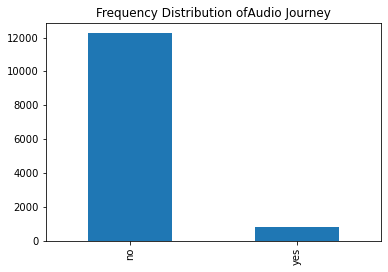

 
Details of Self Explore
----------------------------------------------------------------------------
no     11440
yes     1586
Name: Self Explore, dtype: int64


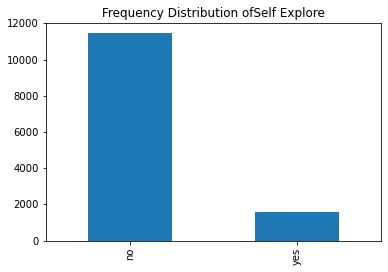

 
Details of Accessories
----------------------------------------------------------------------------
no     7660
yes    5366
Name: Accessories, dtype: int64


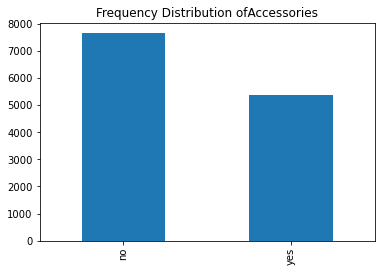

 
Details of EMI
----------------------------------------------------------------------------
no     12483
yes      543
Name: EMI, dtype: int64


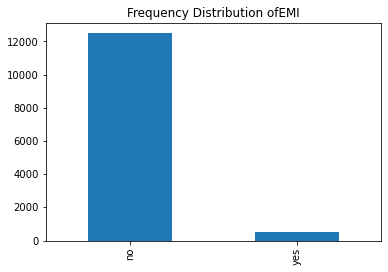

 
Details of Book Now
----------------------------------------------------------------------------
no     12975
yes       51
Name: Book Now, dtype: int64


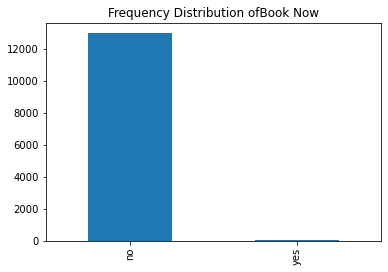

 
Details of Test Drive
----------------------------------------------------------------------------
no     13003
yes       23
Name: Test Drive, dtype: int64


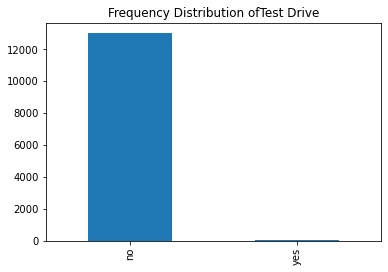

In [13]:
for x in Categorical_column_list:
    univariateAnalysis_category(x)

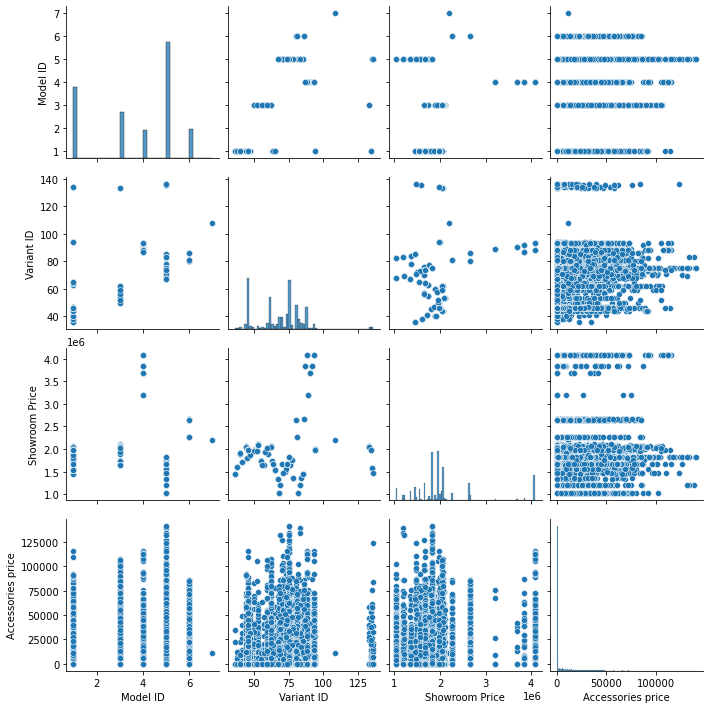

In [14]:
sns.pairplot(A_new[['Model ID', 'Variant ID', 'Showroom Price','Accessories price']])

In [15]:
corr = A_new.corr()
corr

,Model ID,Variant ID,Showroom Price,Accessories price
Model ID,1.000000,0.721017,0.004566,0.059740
Variant ID,0.721017,1.000000,0.311413,0.063303
Showroom Price,0.004566,0.311413,1.000000,0.073453
Accessories price,0.059740,0.063303,0.073453,1.000000


In [16]:
A_new.isnull().sum()

Intro View              0
Audio Journey           0
Self Explore            0
Accessories             0
EMI                     0
Book Now                0
Test Drive              0
Model ID                0
Variant ID              0
Showroom Price          0
Accessories price    2528
dtype: int64

In [17]:
A_new['Accessories price'].fillna(0, inplace = True)

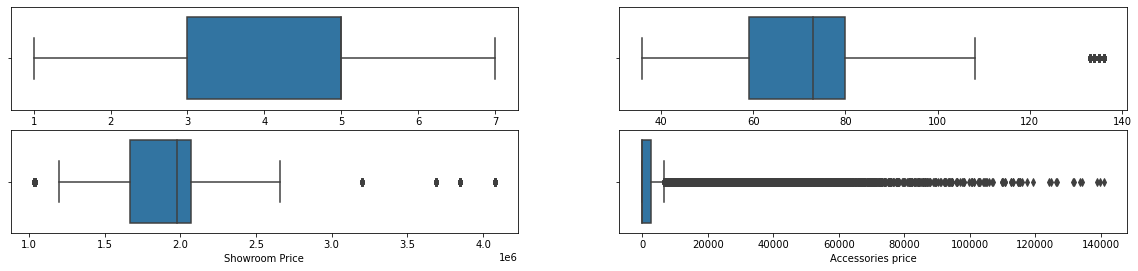

In [18]:
columns = ('Model ID', 'Variant ID', 'Showroom Price', 'Accessories price')
plt.figure(figsize=[20,20])
for i in range(len(columns)):
    plt.subplot(9,2,i+1)
    sns.boxplot(A_new[columns[i]])

array([[<AxesSubplot:title={'center':'Model ID'}>,
        <AxesSubplot:title={'center':'Variant ID'}>],
       [<AxesSubplot:title={'center':'Showroom Price'}>,
        <AxesSubplot:title={'center':'Accessories price'}>]], dtype=object)

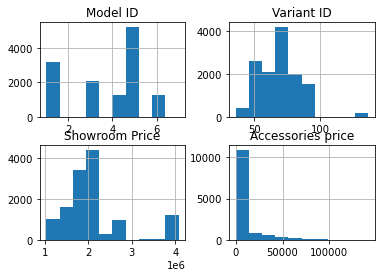

In [19]:
A_new.hist()

In [20]:
A_new['Intro View']=np.where(A_new['Intro View']=='yes','1',A_new['Intro View'])
A_new['Intro View']=np.where(A_new['Intro View']=='no','0',A_new['Intro View'])

In [21]:
A_new['Audio Journey']=np.where(A_new['Audio Journey']=='yes','1',A_new['Audio Journey'])
A_new['Audio Journey']=np.where(A_new['Audio Journey']=='no','0',A_new['Audio Journey'])

In [22]:
A_new['Self Explore']=np.where(A_new['Self Explore']=='yes','1',A_new['Self Explore'])
A_new['Self Explore']=np.where(A_new['Self Explore']=='no','0',A_new['Self Explore'])

In [23]:
A_new['Accessories']=np.where(A_new['Accessories']=='yes','1',A_new['Accessories'])
A_new['Accessories']=np.where(A_new['Accessories']=='no','0',A_new['Accessories'])

In [24]:
A_new['EMI']=np.where(A_new['EMI']=='yes','1',A_new['EMI'])
A_new['EMI']=np.where(A_new['EMI']=='no','0',A_new['EMI'])

In [25]:
A_new['Test Drive']=np.where(A_new['Test Drive']=='yes','1',A_new['Test Drive'])
A_new['Test Drive']=np.where(A_new['Test Drive']=='no','0',A_new['Test Drive'])

In [26]:
A_new['Book Now']=np.where(A_new['Book Now']=='yes','1',A_new['Book Now'])
A_new['Book Now']=np.where(A_new['Book Now']=='no','0',A_new['Book Now'])

In [27]:
A_new['Intro View'] = A_new['Intro View'].astype('int64')

In [28]:
A_new['Audio Journey'] = A_new['Audio Journey'].astype('int64')

In [29]:
A_new['Self Explore'] = A_new['Self Explore'].astype('int64')

In [30]:
A_new['Accessories'] = A_new['Accessories'].astype('int64')

In [31]:
A_new['EMI'] = A_new['EMI'].astype('int64')

In [32]:
A_new['Test Drive'] = A_new['Test Drive'].astype('int64')

In [33]:
A_new['Book Now'] = A_new['Book Now'].astype('int64')

In [34]:
A_new.dtypes

Intro View             int64
Audio Journey          int64
Self Explore           int64
Accessories            int64
EMI                    int64
Book Now               int64
Test Drive             int64
Model ID               int64
Variant ID             int64
Showroom Price         int64
Accessories price    float64
dtype: object

In [35]:
A_new.corr()

,Intro View,Audio Journey,Self Explore,Accessories,EMI,Book Now,Test Drive,Model ID,Variant ID,Showroom Price,Accessories price
Intro View,1.000000,-0.011921,-0.091233,-0.344737,-0.040977,-0.015687,-0.004825,-0.144377,-0.098587,0.174536,-0.174256
Audio Journey,-0.011921,1.000000,0.216950,-0.050540,0.032553,0.009900,0.020034,0.000994,0.008931,0.058361,-0.026339
Self Explore,-0.091233,0.216950,1.000000,-0.026876,0.045675,-0.000788,0.012300,0.024154,0.027307,0.057064,-0.008187
Accessories,-0.344737,-0.050540,-0.026876,1.000000,0.079845,0.012465,0.013097,0.109932,0.080536,-0.073033,0.472819
EMI,-0.040977,0.032553,0.045675,0.079845,1.000000,0.048429,0.036973,0.014746,0.022738,0.009540,0.084565
Book Now,-0.015687,0.009900,-0.000788,0.012465,0.048429,1.000000,0.055925,0.016040,0.008087,-0.030492,0.028948
Test Drive,-0.004825,0.020034,0.012300,0.013097,0.036973,0.055925,1.000000,0.004909,-0.004405,0.006496,0.008321
Model ID,-0.144377,0.000994,0.024154,0.109932,0.014746,0.016040,0.004909,1.000000,0.721017,0.004566,0.072858
Variant ID,-0.098587,0.008931,0.027307,0.080536,0.022738,0.008087,-0.004405,0.721017,1.000000,0.311413,0.073816
Showroom Price,0.174536,0.058361,0.057064,-0.073033,0.009540,-0.030492,0.006496,0.004566,0.311413,1.000000,0.027100


In [36]:
A_new

,Intro View,Audio Journey,Self Explore,Accessories,EMI,Book Now,Test Drive,Model ID,Variant ID,Showroom Price,Accessories price
0,1,0,0,1,0,0,0,3,62,2049800,68629.0
1,0,0,0,0,0,0,0,3,62,2069800,0.0
2,0,0,0,0,0,0,0,3,62,2069800,0.0
3,0,0,0,1,0,0,0,5,85,1455800,21697.0
4,0,0,0,0,0,0,0,4,93,4077800,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13021,0,0,0,0,0,0,0,6,81,2258000,0.0
13022,0,0,0,0,0,0,0,5,74,1669800,0.0
13023,0,0,0,0,0,0,0,1,46,1977800,0.0
13024,0,0,0,1,0,0,0,5,74,1669800,16963.0


In [37]:
A_new['Model ID'].unique()

array([3, 5, 4, 6, 1, 7], dtype=int64)

In [38]:
A_new['Variant ID'].unique()

array([ 62,  85,  93,  80,  88,  67,  75,  65,  71,  86,  70,  44,  68,
        46,  47,  81,  73,  74,  59,  45,  50,  63,  83,  69,  82,  77,
        53,  57,  64,  56,  92,  87,  40,  94,  58,  36,  72,  60,  41,
        78,  89,  84,  76,  52,  90,  38,  55, 134, 133, 108, 136, 135],
      dtype=int64)

In [39]:
A_new['Showroom Price'].unique()

array([2049800, 2069800, 1455800, 4077800, 2649800, 1348000, 1822800,
       1547800, 1468000, 2659800, 1659800, 2035800, 1038000, 1977800,
       1879800, 2258000, 1568000, 1997800, 1669800, 2034800, 1804800,
       1949800, 1747800, 1199800, 1205800, 1031800, 1749800, 2099800,
       1643800, 1667800, 1642800, 1972800, 3844800, 1894800, 1991800,
       1944800, 1442800, 1488000, 2055800, 1992800, 1889800, 1971800,
       1719800, 1368000, 3199800, 2119800, 1361800, 1658000, 1954800,
       3687800, 1899800, 1969800, 1596800, 2060800, 2040800, 1914800,
       2192800, 1478000, 1578000], dtype=int64)

In [40]:
A_new['Accessories price'].unique()

array([68629.,     0., 21697., ..., 62590., 44749., 16963.])

In [41]:
X = A_new.drop('Book Now',axis = 1)
y = A_new[['Book Now']]
test_size = 0.30   #taking 70:30 training and test set
seed = 7   #Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [42]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (9118, 10)
X_test (3908, 10)
y_train (9118, 1)
y_test (3908, 1)


In [43]:
X_train.head()

,Intro View,Audio Journey,Self Explore,Accessories,EMI,Test Drive,Model ID,Variant ID,Showroom Price,Accessories price
3202,0,0,0,0,1,0,5,71,1468000,0.0
5667,0,0,0,0,0,0,1,46,1977800,0.0
121,0,0,0,0,0,0,5,74,1669800,0.0
1363,0,0,0,1,0,0,5,73,1568000,848.0
2359,0,0,0,0,0,0,6,86,2659800,0.0


In [44]:
X_test.head()

,Intro View,Audio Journey,Self Explore,Accessories,EMI,Test Drive,Model ID,Variant ID,Showroom Price,Accessories price
8001,0,0,0,1,0,0,5,75,1822800,0.0
7140,0,0,0,1,0,0,5,70,1659800,1848.0
4866,0,0,0,0,0,0,5,69,1205800,0.0
7241,0,0,0,0,0,0,5,75,1822800,0.0
9679,0,0,0,0,0,0,1,46,1977800,44344.0


In [45]:
y_train.head()

,Book Now
3202,0
5667,0
121,0
1363,0
2359,0


In [46]:
y_test.head()

,Book Now
8001,0
7140,0
4866,0
7241,0
9679,0


In [47]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [48]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.975], flip_y=0, random_state=7)

In [49]:
counter=Counter(y)
counter

Counter({0: 975, 1: 25})

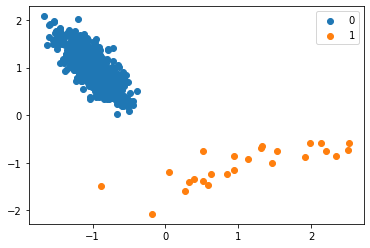

In [50]:
from numpy import where

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [51]:
SM = SMOTE(random_state=7)
X_train_res, y_train_res = SM.fit_resample(X_train, y_train)

In [52]:
print('X_train_res',X_train_res.shape)

print('y_train_res',y_train_res.shape)

X_train_res (18164, 10)
y_train_res (18164, 1)


In [53]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [54]:
counter=Counter(y)
counter

Counter({0: 975, 1: 975})

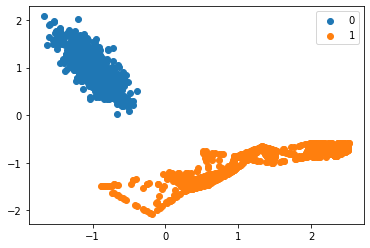

In [55]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9118 entries, 3202 to 12463
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Intro View         9118 non-null   int64  
 1   Audio Journey      9118 non-null   int64  
 2   Self Explore       9118 non-null   int64  
 3   Accessories        9118 non-null   int64  
 4   EMI                9118 non-null   int64  
 5   Test Drive         9118 non-null   int64  
 6   Model ID           9118 non-null   int64  
 7   Variant ID         9118 non-null   int64  
 8   Showroom Price     9118 non-null   int64  
 9   Accessories price  9118 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 783.6 KB


In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3908 entries, 8001 to 7791
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Intro View         3908 non-null   int64  
 1   Audio Journey      3908 non-null   int64  
 2   Self Explore       3908 non-null   int64  
 3   Accessories        3908 non-null   int64  
 4   EMI                3908 non-null   int64  
 5   Test Drive         3908 non-null   int64  
 6   Model ID           3908 non-null   int64  
 7   Variant ID         3908 non-null   int64  
 8   Showroom Price     3908 non-null   int64  
 9   Accessories price  3908 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 335.8 KB


In [58]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18164 entries, 0 to 18163
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Intro View         18164 non-null  int64  
 1   Audio Journey      18164 non-null  int64  
 2   Self Explore       18164 non-null  int64  
 3   Accessories        18164 non-null  int64  
 4   EMI                18164 non-null  int64  
 5   Test Drive         18164 non-null  int64  
 6   Model ID           18164 non-null  int64  
 7   Variant ID         18164 non-null  int64  
 8   Showroom Price     18164 non-null  int64  
 9   Accessories price  18164 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 1.4 MB


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(random_state=7)
gbcl = gbcl.fit(X_train_res, y_train_res)

In [60]:
y_train_predict = gbcl.predict(X_train_res)
model_score = gbcl.score(X_train_res, y_train_res)

print(model_score)

print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9386148425456948
[[8363  719]
 [ 396 8686]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      9082
           1       0.92      0.96      0.94      9082

    accuracy                           0.94     18164
   macro avg       0.94      0.94      0.94     18164
weighted avg       0.94      0.94      0.94     18164



In [61]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)

print(model_score)

print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9240020470829069
[[3610  283]
 [  14    1]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      3893
           1       0.00      0.07      0.01        15

    accuracy                           0.92      3908
   macro avg       0.50      0.50      0.48      3908
weighted avg       0.99      0.92      0.96      3908



In [62]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=7)
RF_model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=7)

In [63]:
y_train_predict = RF_model.predict(X_train_res)
model_score = RF_model.score(X_train_res, y_train_res)

print(model_score)

print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9836489759964765
[[8803  279]
 [  18 9064]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      9082
           1       0.97      1.00      0.98      9082

    accuracy                           0.98     18164
   macro avg       0.98      0.98      0.98     18164
weighted avg       0.98      0.98      0.98     18164



In [64]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)

print(model_score)

print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9595701125895599
[[3749  144]
 [  14    1]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3893
           1       0.01      0.07      0.01        15

    accuracy                           0.96      3908
   macro avg       0.50      0.51      0.50      3908
weighted avg       0.99      0.96      0.98      3908

